<a href="https://colab.research.google.com/github/erinijapranckeviciene/ppolygenic/blob/master/ppolygenic_working_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction.** In this notebook, the Total Genotype Score modeling, computation from real data and visualization are introduced. The outcomes of the computations in this notebook rely on **"Functions to compute and use TGS".** This section of code must be executed first. Other sections are  rather independant of each other.


# Section 1. TGS modeling and computation. General and demo information. **Functions and data structures**

## Demonstrating data structures to store the programmatic TGS model. Examples for injury, endurance-power, vitamin B12 status. Execute a cell below. 

In [52]:
################################################################################
# Data structure  markers to store information about the multimaarker phenotype
#
markers = \
    {'injury': \
     {'rs12722':  {'gene':'COL5A1','genotype_scores':{'TT':1,'CT':0,'CC':-1},'frequencies':{'TT':0.07,'CT':0.36,'CC':0.57}, 'conf': 1},\
      'rs1800012':{'gene':'COL1A1','genotype_scores':{'CC':0,'AC':0,'AA':-1},'frequencies':{'CC':0.66,'AC':0.30,'AA':0.04}, 'conf': 1},\
      'rs679620': {'gene':'MMP3',  'genotype_scores':{'AA':1,'AG':0,'GG':-1},'frequencies':{'AA':0.31,'AG':0.53,'GG':0.16}, 'conf': 0.75}},\
    'endurance_power': \
     {'rs699':     {'gene':'AGT', 'genotype_scores':{'AA': 1, 'AG': 0, 'GG': -1},'frequencies':{'AA': 0.0676, 'AG': 0.3848, 'GG': 0.5476},'allele_freq':{'A':0.26,'G':0.74}, 'conf': 1},\
      'rs1042713': {'gene':'ADRB2','genotype_scores':{'AA': 1, 'AG': 0, 'GG': -1},'frequencies':{'AA': 0.2304, 'AG': 0.4992, 'GG': 0.2704},'allele_freq':{'A':0.48,'G':0.52}, 'conf': 1},\
      'rs11549465':{'gene':'HIF1A','genotype_scores':{'CC': 1, 'CT': 0, 'TT': -1},'frequencies':{'CC': 0.8575, 'CT': 0.1370, 'TT': 0.0055},'allele_freq':{'C':0.926,'T':0.074}, 'conf': 1}},\
    'vitaminB12': \
     {'rs1801133':    {'gene':'MTHFR', 'genotype_scores':{'GG': 0, 'AG': -0.7, 'AA': -1},'frequencies':{'GG': 0.57, 'AG': 0.33, 'AA': 0.1},'conf': 1},\
      'rs602662': {'gene':'FUT2','genotype_scores':{'AA': 0.7, 'AG': 0, 'GG': -1},'frequencies':{'AA': 0.20, 'AG': 0.35, 'GG': 0.45}, 'conf': 1},\
      'rs526934':{'gene':'TCN1','genotype_scores':{'AA': 0, 'AG': -1, 'GG': -1},'frequencies':{'AA': 0.65, 'AG': 0.30, 'GG': 0.05}, 'conf': 1},\
      'rs1801222':{'gene':'CUBN','genotype_scores':{'CC': 1, 'CT': 0, 'TT': -1},'frequencies':{'CC': 0.65, 'CT': 0.30, 'TT': 0.05}, 'conf': 1}}}



##############################################################################
# Data structure  -markers- extended with additional block of different markers
markers_plus ={ \
# Injury
'injury': \
     {'rs12722':  {'gene':'COL5A1','genotype_scores':{'TT':1,'CT':0,'CC':-1},'frequencies':{'TT':0.07,'CT':0.36,'CC':0.57}, 'conf': 1},\
      'rs1800012':{'gene':'COL1A1','genotype_scores':{'CC':0,'AC':0,'AA':-1},'frequencies':{'CC':0.66,'AC':0.30,'AA':0.04}, 'conf': 1},\
      'rs679620': {'gene':'MMP3',  'genotype_scores':{'AA':1,'AG':0,'GG':-1},'frequencies':{'AA':0.31,'AG':0.53,'GG':0.16}, 'conf': 0.75}},\

# Vilnius endurance_power
     'endurance_power_vilnius': \
                {'rs1799752':     {'gene':'ACE', 'genotype_scores':{'DD': 1, 'ID': 0, 'II': -1},'allele_freq':{'I':0.43,'D':0.57}, 'conf': 1},\
                 'rs1815739':     {'gene':'ACTN3', 'genotype_scores':{'RR': 1, 'RX': 0, 'XX': -1},'allele_freq':{'R':0.65,'X':0.35}, 'conf': 1},\
                 'rs7293': {'gene':'MB','genotype_scores':{'AA': 1, 'AG': 0, 'GG': -1},'allele_freq':{'A':0.5,'G':0.5}, 'conf': 0.75},\
                 'rs17602729':{'gene':'AMPD1','genotype_scores':{'CC': 1, 'CT': -1, 'TT': -1},'allele_freq':{'C':0.85,'T':0.15}, 'conf': 0.75}},\

# Endurance_power
    'endurance_power': \
     {'rs699':     {'gene':'AGT', 'genotype_scores':{'AA': 1, 'AG': 0, 'GG': -1},'frequencies':{'AA': 0.0676, 'AG': 0.3848, 'GG': 0.5476},'allele_freq':{'A':0.26,'G':0.74}, 'conf': 1},\
      'rs1042713': {'gene':'ADRB2','genotype_scores':{'AA': 1, 'AG': 0, 'GG': -1},'frequencies':{'AA': 0.2304, 'AG': 0.4992, 'GG': 0.2704},'allele_freq':{'A':0.48,'G':0.52}, 'conf': 1},\
      'rs11549465':{'gene':'HIF1A','genotype_scores':{'CC': 1, 'CT': 0, 'TT': -1},'frequencies':{'CC': 0.8575, 'CT': 0.1370, 'TT': 0.0055},'allele_freq':{'C':0.926,'T':0.074}, 'conf': 1}}}

#################################################################
# Labels to generate synthetic data
labels={'injury':{'risk':0.50,'no-risk':0.5},'endurance_power':{'endurance':0.35,'mix':0.35,'power':0.30},'vitaminB12':{'high':0.20,'higher':0.20,'normal':0.20,'lower':0.20,'low':0.20}}
##################################################################


In [ ]:
markers['injury']['rs12722']['frequencies']

{'CC': 0.57, 'CT': 0.36, 'TT': 0.07}

## TGS Functions to perform computations. This code should be executed first in order to analyze the real data. THIS CODE IS REQUIRED FOR THE REAL DATA ANALYSIS. THIS IS A STEP 1 to run analysis with LT athletes data. Execute a cell below. 

In [ ]:
####################################################
# TGS functions
####################################################
from math import erf,exp
from itertools import product
from scipy.stats import binom


import numpy as np
import pandas as pd

import csv

# TGS computation
def total_genotype_score(markers_list,markers_dict):
    """
    total_genotype_score(markers_list,markers_dict)
    Function: computes a total genotype score TGS
    Input: 
        markers_list: 
          string of comma separated pairs of a marker rs id
          followed by whitespace followed by a genotype. Example:
          markers_list='rs12722 TT, rs1800012 AA, rs679620 AG'
        markers_dict: 
          dictionary of markers. Example: markers['injury']  
    Return value: 
        float TGS:
          total genotype score computed as a dot product of two vectors 
          a vector of individual genotype scores and 
          a vector of marker confidence scores 
    """

    id_gt_pairs = markers_list.split(',')
    n_gt_pairs  = len(id_gt_pairs)
#    if n_gt_pairs <> 3 : # number of markers may be arbitrary, here 3  
    if n_gt_pairs < 2 : # test if it is multimarker, STOP if it is one marker
            return -101

    gt_score    = list() # vector of marker scores
    gt_freq     = list() # vector of genotype frequencies
    marker_conf = list() # vector of confidence scores
    for id_gt in id_gt_pairs:
        if len(id_gt.split()) != 2:
            print("<p> part is missing</p>")
            return -104

        (identity,genotype) = id_gt.split()
        #print identity, genotype
        if identity in markers_dict:
            marker_conf.append(float(markers_dict[identity]['conf']))
        else:
            print("<p> Invalid identity </p>")
            return -102 # Invalid identity

        if genotype in markers_dict[identity]['genotype_scores']:
            gt_score.append(float(markers_dict[identity]['genotype_scores'][genotype]))
        else:
            print("<p> Invalid genotype </p>")
            return -103 # Invalid genotype

        if genotype in markers_dict[identity]['frequencies']:
            gt_freq.append(float(markers_dict[identity]['frequencies'][genotype]))
        else:
            print("<p> Invalid genotype </p>")
            return -103 # Invalid genotype    
      
    # apply error function to map the score into [-1 , 1] interval
    score = sum([gt_score[i]*marker_conf[i] for i in range(0,n_gt_pairs)])
    fscore = np.prod(list(gt_freq))

    # normalization constant is a sum of confidences
    normalization_constant = sum(markers_dict[i]['conf'] for i in markers_dict.keys())

    # normalized score
    normalized_score = score/normalization_constant

    #erf_score = erf(normalized_score)
    # apply sigmoid function and constant shift into interval [-1,1]
    #sigmoid_score = 1/(1+exp(-normalized_score))-0.5
    # return original score and a normalized_score
    #return [score,normalized_score,erf_score,sigmoid_score]
    return [score,normalized_score,fscore]

#####################################################################################  
# test total_genotype_score
def genotype_combinations_tgs(markers_dict):

    """
    Testing TGS function on all possible genotype combinations 
    It works with any type of markers and any number of marker states
    """
    genotypes_list    = list() # list of genotypes of each marker
    marker_names_list = list() # list of marker names (rs ids)

    for marker_id in markers_dict:
        genotypes_list.append(list(markers_dict[marker_id]['genotype_scores'].keys() ))
        #print(marker_id)
        marker_names_list.append(marker_id)
    #print("genotypes_list")    
    #print(genotypes_list)
    #print("marker_names_list")
    #print(marker_names_list)
    

    # Enumerate explicitly all possible combinations of genotypes.  
    # Generate string for a command: list(itertools.product(['TT','CT','CC'],...,['AA','AG','GG']))

    arg_i = list() # arguments for itertools.product()
    for marker_genotypes in genotypes_list:
        arg_i.append(str(marker_genotypes))
        #Evaluate itertools.product command and get all combinations of genotype indexes
        #print("arg_i")
        #print(arg_i)
        #arg_i : ["dict_keys(['TT', 'CT', 'CC'])", "dict_keys(['CC', 'AC', 'AA'])", "dict_keys(['AA', 'AG', 'GG'])"]
        #print("join")
        #print("list(product("+",".join(arg_i)+") )")
  
    genotype_combinations = eval("list(product("+",".join(arg_i)+"))")
    #print(genotype_combinations)

    tgs_vec               = list()
    table_gt_combinations = list()
    header = "Index"+","+",".join(marker_names_list)+","+",".join(["TGS","TGS_cnormalized","GTprobability"])
    table_gt_combinations.append(header)

    for gt_index,gt_combination in enumerate(genotype_combinations):
        arg_i=list() # arg_i parameter string to call TGS function
        for index,genotype in enumerate(gt_combination):
            arg_i.append(marker_names_list[index]+" "+genotype)
        # print(arg_i)    

        tgs = total_genotype_score(",".join(arg_i),markers_dict) # Compute TGS
        tgs_str = ["%.4f" % tgs[i] for i in range(len(tgs))]
        line=str(gt_index)+","+",".join(gt_combination)+","+",".join(tgs_str) #Add row to the table
        table_gt_combinations.append(line) #Add row to the table
        tgs_vec.append(tgs[0]) # TGS non-normalized 
  

    # Create dictionary for TGS frequency distribution 
    tgs_frequency_dist=list()    
    tgs_frequency_dist.append(['TGSValue','TGSCount'])
    tgs_values=list(set(tgs_vec)) # Count unique score occurrences
    for x in tgs_values:
        tgs_frequency_dist.append([x,tgs_vec.count(x)])

    # sort by value
    #print tgs_frequency_dist
    return [table_gt_combinations,tgs_frequency_dist]

#####################################################################################  
# Convert csv type of enumerated genotypes into  
# pandas dataframe and add a normalized TGS column in the interval -1,1 . 
def GTcombinations_to_df(table_gt_combinations):
    # Convert the table_gt_combinations to the pandas dataframe
    # add the column with unique genotype 
    # add the column with TGS normalized into -1 1 interval 
    v=[]
    colnames=table_gt_combinations[0].split(sep=",")
    for x in table_gt_combinations[1:]:
       v.append(x.split(sep=",")) 
    TGSmat=pd.DataFrame(v,columns=colnames)
    TGSmat['TGS']=TGSmat['TGS'].astype(float)
    # Normalization at this stage means mapping the TGS into interval [-1, 1]. 
    # formula thanks to this link https://math.stackexchange.com/questions/914823/shift-numbers-into-a-different-range/914843
    # [a,b] onto [c,d]  f(t)=c+((d-c)/(b-a))*(t-a)

    def intervalf(x,a=min(TGSmat['TGS']),b=max(TGSmat['TGS']),c=-1,d=1):
        return c+((d-c)/(b-a))*(x-a)
    # normalize TGS
    TGSmat['TGS_normalized']=TGSmat['TGS'].apply(intervalf)
    return TGSmat

#####################################################################################  
# generate sample of size n for multiple markers 
# add random phenotypic information
def generate_marker_table(markers,n,labels):
    """
    Input:
        markers - markers[phenotype] Ex: markers['injury']
        n -  number of rows in the sample
        labels - dictionary of phenotype labels Ex: {'endurance':0.35,'mix':0.35,'power':0.30} 
    Output:
        table in which each column represents a marker
        last column  class represents phenotypic information 
    """
    table = {}
    for rsid in markers.keys():
        m = np.random.choice(markers[rsid]['frequencies'].keys(),n,markers[rsid]['frequencies'].values())
        table[rsid] = m
    table['class'] = np.random.choice(labels.keys(),n,labels.values())
    return table


#####################################################################################  
# write synthetic multi marker table to file
def marker_table_to_csv(marker_table, output_csv_file_name):

    # create object to write to csv file
    csv_writer = csv.writer(open(output_csv_file_name,'w'),delimiter=',')
    header = marker_table.keys()
    n = len(marker_table[header[0]])
    csv_writer.writerow(header)
    for i in range(n):
        csv_writer.writerow([marker_table[k][i] for k in header])

####### Data with labels prepare for testing ##############################
# Read markers from csv , compute TGS, 
# write markers and TGS to csv for testing in another environment
def class_table_csv_for_testing(input_csv_file_name, phenotype_markers, output_csv_file_name):
    class_table = list()
    with open(input_csv_file_name) as csvfile:
        reader = csv.DictReader(csvfile)
        #only extract keys that begin with rs
        for row in reader:
            markers = list()
            rsids = [s for s in row.keys() if 'rs' in s] 
            #print rsids
            # create markers_list input to tgs_function
            for rsid in rsids:
                markers.append(' '.join([rsid,row[rsid]]))
            markers_list = ','.join(markers)
            # compute total genotype score
            rez =total_genotype_score(markers_list, phenotype_markers) 
            rezs = [str(r) for r in rez]
            s=','.join(rezs) 

            line = ','.join([markers_list,row['class'],','.join(rezs)])
            class_table.append(line.split(','))
    #print output_csv_file_name
    with open(output_csv_file_name,'w') as outf:
        for row in class_table:
            row_str=",".join(row)
            #print row_str
            outf.write("%s\n" % row_str)

    return class_table
####### END OF FUNCTIONS ##############################


## This section shows code how to call the TGS functions on the Example structures. Examples of TGS models. The code snippets to model TGS of different traits and to demonstrate data structures and computations for the example Injury markers, Power-endirance markers and Vitamin B12 status markers. Each cell can be run independently. For real data, make sure that there is a frequency tupple in the data structure. 


### **Injury markers**

In [ ]:
import sys
import itertools
import csv
import pandas as pd

#from tgs_functions import total_genotype_score, markers, markers_plus, genotype_combinations_tgs, generate_marker_table, marker_table_to_csv,class_table_csv_for_testing,labels

##############################################################################
# Testing markers computing all genotype combinations and TGS  frequency table
##############################################################################

####### Injury markers

injury_gt_list='rs12722 TT, rs1800012 AA, rs679620 GG'
injury_gt_list2='rs12722 CT, rs1800012 AA'

tgs_injury = total_genotype_score(injury_gt_list2,markers['injury'])
print("Injury markers: ",injury_gt_list2)
print("TGS computed: ", tgs_injury)

co = genotype_combinations_tgs(markers['injury'])
tg=co[0]
ft=co[1]

print(s)
print("Injury markers: all genotype combinations and their TGS as csv file format:") 
for x in tg:
    print(x)

tgdf=GTcombinations_to_df(tg)
tgdf.head

#print("Injury markers: table of TGS frequency distribution:") 
#for x in ft:
#    print(x)



Injury markers:  rs12722 CT, rs1800012 AA
TGS computed:  [-1.0, -0.36363636363636365, 0.0144]
['Index', 'rs1799752', 'rs1815739', 'rs7293', 'rs17602729', 'TGS', 'TGS_cnormalized', 'GTprobability']
Injury markers: all genotype combinations and their TGS as csv file format:
Index,rs12722,rs1800012,rs679620,TGS,TGS_cnormalized,GTprobability
0,TT,CC,AA,1.7500,0.6364,0.0143
1,TT,CC,AG,1.0000,0.3636,0.0245
2,TT,CC,GG,0.2500,0.0909,0.0074
3,TT,AC,AA,1.7500,0.6364,0.0065
4,TT,AC,AG,1.0000,0.3636,0.0111
5,TT,AC,GG,0.2500,0.0909,0.0034
6,TT,AA,AA,0.7500,0.2727,0.0009
7,TT,AA,AG,0.0000,0.0000,0.0015
8,TT,AA,GG,-0.7500,-0.2727,0.0004
9,CT,CC,AA,0.7500,0.2727,0.0737
10,CT,CC,AG,0.0000,0.0000,0.1259
11,CT,CC,GG,-0.7500,-0.2727,0.0380
12,CT,AC,AA,0.7500,0.2727,0.0335
13,CT,AC,AG,0.0000,0.0000,0.0572
14,CT,AC,GG,-0.7500,-0.2727,0.0173
15,CT,AA,AA,-0.2500,-0.0909,0.0045
16,CT,AA,AG,-1.0000,-0.3636,0.0076
17,CT,AA,GG,-1.7500,-0.6364,0.0023
18,CC,CC,AA,-0.2500,-0.0909,0.1166
19,CC,CC,AG,-1.0000,-0.3636,0

<bound method NDFrame.head of    Index rs12722 rs1800012  ... TGS_cnormalized  GTprobability TGS_normalized
0      0      TT        CC  ...          0.6364         0.0143       1.000000
1      1      TT        CC  ...          0.3636         0.0245       0.666667
2      2      TT        CC  ...          0.0909         0.0074       0.333333
3      3      TT        AC  ...          0.6364         0.0065       1.000000
4      4      TT        AC  ...          0.3636         0.0111       0.666667
5      5      TT        AC  ...          0.0909         0.0034       0.333333
6      6      TT        AA  ...          0.2727         0.0009       0.555556
7      7      TT        AA  ...          0.0000         0.0015       0.222222
8      8      TT        AA  ...         -0.2727         0.0004      -0.111111
9      9      CT        CC  ...          0.2727         0.0737       0.555556
10    10      CT        CC  ...          0.0000         0.1259       0.222222
11    11      CT        CC  ...   

### **Power-endurance markers**

In [ ]:
####### Endurance and power markers

endurance_power_gt_list='rs699 AA, rs1042713 AG, rs11549465 CT'

tgs_endurance_power = total_genotype_score(endurance_power_gt_list,markers['endurance_power'])
print("Endurance_power markers: ",endurance_power_gt_list) 
print("TGS computed: ", tgs_endurance_power)

co = genotype_combinations_tgs(markers['endurance_power'])
tg=co[0]
ft=co[1]

print("Endurance and power markers: all genotype combinations and their TGS:") 
for x in tg:
    print(x)

print("Endurance and power markers: table of TGS frequency distribution:") 
for x in ft:
    print(x)


Endurance_power markers:  rs699 AA, rs1042713 AG, rs11549465 CT
TGS computed:  [1.0, 0.3333333333333333, 0.004623191039999999]
Endurance and power markers: all genotype combinations and their TGS:
Index,rs699,rs1042713,rs11549465,TGS,TGS_normalized,GTprobability
0,AA,AA,CC,3.0000,1.0000,0.0134
1,AA,AA,CT,2.0000,0.6667,0.0021
2,AA,AA,TT,1.0000,0.3333,0.0001
3,AA,AG,CC,2.0000,0.6667,0.0289
4,AA,AG,CT,1.0000,0.3333,0.0046
5,AA,AG,TT,0.0000,0.0000,0.0002
6,AA,GG,CC,1.0000,0.3333,0.0157
7,AA,GG,CT,0.0000,0.0000,0.0025
8,AA,GG,TT,-1.0000,-0.3333,0.0001
9,AG,AA,CC,2.0000,0.6667,0.0760
10,AG,AA,CT,1.0000,0.3333,0.0121
11,AG,AA,TT,0.0000,0.0000,0.0005
12,AG,AG,CC,1.0000,0.3333,0.1647
13,AG,AG,CT,0.0000,0.0000,0.0263
14,AG,AG,TT,-1.0000,-0.3333,0.0011
15,AG,GG,CC,0.0000,0.0000,0.0892
16,AG,GG,CT,-1.0000,-0.3333,0.0143
17,AG,GG,TT,-2.0000,-0.6667,0.0006
18,GG,AA,CC,1.0000,0.3333,0.1082
19,GG,AA,CT,0.0000,0.0000,0.0173
20,GG,AA,TT,-1.0000,-0.3333,0.0007
21,GG,AG,CC,0.0000,0.0000,0.2344
22,GG,AG,CT

### **Vitamin B12 markers**

In [ ]:


####### Vitamin B12 markers

vitaminB12_gt_list='rs1801133 GG, rs602662 AA, rs526934 AG, rs1801222 CC'

tgs_vitaminB12 = total_genotype_score(vitaminB12_gt_list,markers['vitaminB12'])
print("VitaminB12 markers: ",vitaminB12_gt_list) 
print("TGS computed: ", tgs_vitaminB12)

co = genotype_combinations_tgs(markers['vitaminB12'])
tg=co[0]
ft=co[1]

print("Vitamin B12 status markers: all genotype combinations and their TGS:") 
for x in tg:
    print(x)

print("Vitamin B12 status markers: table of TGS frequency distribution:") 
for x in ft:
    print(x)

VitaminB12 markers:  rs1801133 GG, rs602662 AA, rs526934 AG, rs1801222 CC
TGS computed:  [0.7, 0.175, 0.022229999999999996]
Vitamin B12 status markers: all genotype combinations and their TGS:
Index,rs1801133,rs602662,rs526934,rs1801222,TGS,TGS_normalized,GTprobability
0,GG,AA,AA,CC,1.7000,0.4250,0.0482
1,GG,AA,AA,CT,0.7000,0.1750,0.0222
2,GG,AA,AA,TT,-0.3000,-0.0750,0.0037
3,GG,AA,AG,CC,0.7000,0.1750,0.0222
4,GG,AA,AG,CT,-0.3000,-0.0750,0.0103
5,GG,AA,AG,TT,-1.3000,-0.3250,0.0017
6,GG,AA,GG,CC,0.7000,0.1750,0.0037
7,GG,AA,GG,CT,-0.3000,-0.0750,0.0017
8,GG,AA,GG,TT,-1.3000,-0.3250,0.0003
9,GG,AG,AA,CC,1.0000,0.2500,0.0843
10,GG,AG,AA,CT,0.0000,0.0000,0.0389
11,GG,AG,AA,TT,-1.0000,-0.2500,0.0065
12,GG,AG,AG,CC,0.0000,0.0000,0.0389
13,GG,AG,AG,CT,-1.0000,-0.2500,0.0180
14,GG,AG,AG,TT,-2.0000,-0.5000,0.0030
15,GG,AG,GG,CC,0.0000,0.0000,0.0065
16,GG,AG,GG,CT,-1.0000,-0.2500,0.0030
17,GG,AG,GG,TT,-2.0000,-0.5000,0.0005
18,GG,GG,AA,CC,0.0000,0.0000,0.1084
19,GG,GG,AA,CT,-1.0000,-0.2500,0.050

# Section 2. Real models based on Lithuanian athletes data. Gene markers ACE, ACTN3, AMPD1 and MB. 

## EXAMPLE endurance-power multimarker profile written into the TGS data structure that was created from literature. This code snippet shows how to encode a model into the data structure. The variable TGSmat is created for plotting.  This snippet is copied and modified for each new model.  

In [ ]:
import sys
import itertools
import csv
import pandas

####### Endurance_power_markers dictionary 
markers_endpow ={ \
# Endurance_power markers from literature evidence
     'endurance_power_vilnius': \
                {'ACE_rs1799752':     {'gene':'ACE', 'genotype_scores':{'DD': 1, 'ID': 0, 'II': -1},'frequencies':{'DD': 0.247, 'ID': 0.369, 'II': 0.384},'allele_freq':{'I':0.43,'D':0.57}, 'conf': 1},\
                 'ACTN3_rs1815739':     {'gene':'ACTN3', 'genotype_scores':{'RR': 1, 'RX': 0, 'XX': -1},'frequencies':{'RR': 0.408, 'RX': 0.49, 'XX': 0.102},'allele_freq':{'R':0.65,'X':0.35}, 'conf': 1},\
                 'MB_rs7293': {'gene':'MB','genotype_scores':{'AA': 1, 'AG': 0, 'GG': -1},'frequencies':{'AA': 0.271, 'AG': 0.455, 'GG': 0.275},'allele_freq':{'A':0.5,'G':0.5}, 'conf': 0.75},\
                 'AMPD1_rs17602729':{'gene':'AMPD1','genotype_scores':{'CC': 1, 'CT': -1, 'TT': -1},'frequencies':{'CC': 0.722, 'CT': 0.255, 'TT': 0.024},'allele_freq':{'C':0.85,'T':0.15}, 'conf': 0.75}}}

endpow_gt_list='ACE_rs1799752 DD, ACTN3_rs1815739 RR, MB_rs7293 AA, AMPD1_rs17602729 CC '

tgs_endpow = total_genotype_score(endpow_gt_list, markers_endpow['endurance_power_vilnius'])
print("Endurance power markers LT data: ",endpow_gt_list)
print("TGS computed: ", tgs_endpow)

co = genotype_combinations_tgs(markers_endpow['endurance_power_vilnius'])
# tg has a matrix of all combinations of the genotypes of markers in the model
tg=co[0]
# ft has a frequency distribution of the TGS 
#ft=co[1]

# Uncomment if you need to print a csv like data
#print("Endurance-power markers: all genotype combinations and their TGS:") 
#for x in tg:
#    print(x)

# Create a dataframe from all combinations and add GT column of benotype combinations
TGSmat=GTcombinations_to_df(tg)
TGSmat['GT']=TGSmat['ACE_rs1799752']+TGSmat['ACTN3_rs1815739']+TGSmat['MB_rs7293']+TGSmat['AMPD1_rs17602729']
TGSmat



Endurance power markers LT data:  ACE_rs1799752 DD, ACTN3_rs1815739 RR, MB_rs7293 AA, AMPD1_rs17602729 CC 
TGS computed:  [3.5, 1.0, 0.019718033711999997]


,Index,ACE_rs1799752,ACTN3_rs1815739,MB_rs7293,AMPD1_rs17602729,TGS,TGS_cnormalized,GTprobability,TGS_normalized,GT
0,0,DD,RR,AA,CC,3.50,1.0000,0.0197,1.000000,DDRRAACC
1,1,DD,RR,AA,CT,2.00,0.5714,0.0070,0.571429,DDRRAACT
2,2,DD,RR,AA,TT,2.00,0.5714,0.0007,0.571429,DDRRAATT
3,3,DD,RR,AG,CC,2.75,0.7857,0.0331,0.785714,DDRRAGCC
4,4,DD,RR,AG,CT,1.25,0.3571,0.0117,0.357143,DDRRAGCT
...,...,...,...,...,...,...,...,...,...,...
76,76,II,XX,AG,CT,-2.75,-0.7857,0.0045,-0.785714,IIXXAGCT
77,77,II,XX,AG,TT,-2.75,-0.7857,0.0004,-0.785714,IIXXAGTT
78,78,II,XX,GG,CC,-2.00,-0.5714,0.0078,-0.571429,IIXXGGCC
79,79,II,XX,GG,CT,-3.50,-1.0000,0.0027,-1.000000,IIXXGGCT


# Section 3. Load real data of Lithuanian athletes. THIS IS STEP2 REQUIRED FOR FURTHER ANALYSIS. Columns contain genotypes, sport class and gender. A column 'GT' with genotype combinations are added. Variables lt_athletes_data and ltad are created.   

In [53]:
import pandas as pd
# read the data
url="https://raw.githubusercontent.com/erinijapranckeviciene/ppolygenic/master/lt_athletes.csv"
lt_athletes_data = pd.read_csv(url)
#print(lt_athletes_data.columns)
#lt_athletes_data.describe(include=['int','int64','float','object'])
uniqgt=lt_athletes_data['ACE_rs1799752']+lt_athletes_data['ACTN3_rs1815739']+lt_athletes_data['MB_rs7293']+lt_athletes_data['AMPD1_rs17602729']

# Variable ltad 
ltad=lt_athletes_data.copy()
ltad['GT']=uniqgt

# The genotype combination column added
print(ltad.head())


  ACTN3_rs1815739 AMPD1_rs17602729 MB_rs7293  ...      class gender        GT
0              RX               CT        AA  ...  endurance      F  IDRXAACT
1              RR               CC        AA  ...  endurance      F  IDRRAACC
2              XX               CT        AA  ...      power      M  IIXXAACT
3              RX               CC        AG  ...      power      M  DDRXAGCC
4              RX               CC        AA  ...      power      M  IIRXAACC

[5 rows x 7 columns]


## Section 3.1. With the data loaded apply Logistic regression to classify athletes data into sport classes. The scikit-learn library is used to get the Logistic regression model. Athletes are classified into the respective sports classes using only their genotype data. LR model estimates coefficients at each genotype. These coefficients will be used to infer a Genotypic score of the genotype in the TGS model. This section uses variable lt_athletes_data. For each classification a tenfold cross-validation is performed K=10 for the parameter value C=1. The dfdrez matrix shows coefficients of all classifiers fitted on all data and separately  males and females. The matrix classprob t each coefficient shows a probability of how the single genotype alone classifies the samples : in favor to which class and at what magnitude.  

## Section 3.2. Functions required for computations. Execute first.


In [54]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression

##############################################################
## Function to create training data for Logstic Regression
##############################################################
def logreg_data(athletes,gender,noclass,class1,class2):
  if gender!='B':
    athld=athletes[(athletes['gender']==gender)].copy()
  else:
    athld=athletes 
  # create X_train and y_train excluding noclass 
  X=athld[(athld['class']!=noclass)]
  target=X['class']
  X_train=pd.get_dummies(X.drop(['gender','class'],axis=1))
  target.replace([class1],1,inplace=True)
  target.replace([class2],-1,inplace=True)
  y_train=target.astype(int)
  return [X_train,y_train]

##################################################################
## Function od class probability
##################################################################
def classp(x):
        return 1/(1+exp(-x))
 
##################################################################
# Function to print p-values of Logistic Regression coeficcients
# Can't be applied, deviates from R results considerably
##################################################################
def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

# test p-values
#x = np.arange(10)[:, np.newaxis]
#y = np.array([0,0,0,1,0,0,1,1,1,1])
#model = LogisticRegression(C=1e30).fit(x, y)
#print(logit_pvalue(model, x))
#thanks to : https://stackoverflow.com/questions/25122999/scikit-learn-how-to-check-coefficients-significance


## Section 3.3. Fit a model and clasify Endurance versus Power

In [55]:
import pandas as pd

from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import confusion_matrix

T=logreg_data(athletes=lt_athletes_data,gender='B',noclass='mix',class1='endurance',class2='power')
X_train=T[0]
y_train=T[1]

clf = LogisticRegression(random_state=0, C=1).fit(X_train, y_train)
y_pred=clf.predict(X_train)

print("LR model prediction score on training data")
print(" E vs P all athletes")
print(clf.score(X_train, y_train))
print("Confusion matrix")
print(confusion_matrix(y_train, y_pred))
clfcv =  LogisticRegressionCV(cv=10, Cs=[1.0], random_state=0).fit(X_train, y_train)
print("10fold crossval meand and std")
print(np.mean(clfcv.scores_[1]) )
print(np.std(clfcv.scores_[1]) )

# This computation of significance is not good
#model = LogisticRegression(C=1e30).fit(X_train, y_train)
# model = LogisticRegression(C=1e50).fit(X_train, y_train)
# pval=logit_pvalue(model, X_train)

# Save data
dfdrez=pd.DataFrame(clf.coef_[0],columns=['LR_EvsP_all'], index=X_train.columns)
classprobEP=pd.DataFrame(clf.coef_[0],columns=['LR_EvsP_all'], index=X_train.columns)
# apply p=1/(1+exp(-b)) to each coefficient
classprobEP['LR_EvsP_all_p']=classprobEP['LR_EvsP_all'].apply(classp)

# Same fitting for female athletes
T=logreg_data(athletes=lt_athletes_data,gender='F',noclass='mix',class1='endurance',class2='power')
X_train=T[0]
y_train=T[1]


clf = LogisticRegression(random_state=0, C=1).fit(X_train, y_train)
y_pred=clf.predict(X_train)

print("LR model prediction score on training data")
print(" E vs P female athletes")
print(clf.score(X_train, y_train))
print("Confusion matrix")
print(confusion_matrix(y_train, y_pred))
clfcv =  LogisticRegressionCV(cv=10, Cs=[1.0], random_state=0).fit(X_train, y_train)
print("10fold crossval meand and std")
print(np.mean(clfcv.scores_[1]) )
print(np.std(clfcv.scores_[1]) )

dfdrez['LR_EvsP_females']=clf.coef_[0]

T=logreg_data(athletes=lt_athletes_data,gender='M',noclass='mix',class1='endurance',class2='power')
X_train=T[0]
y_train=T[1]

clf = LogisticRegression(random_state=0, C=1).fit(X_train, y_train)
y_pred=clf.predict(X_train)

print("LR model prediction score on training data")
print(" E vs P male athletes")
print(clf.score(X_train, y_train))
print("Confusion matrix")
print(confusion_matrix(y_train, y_pred))

clfcv =  LogisticRegressionCV(cv=10, Cs=[1.0], random_state=0).fit(X_train, y_train)
print("10fold crossval meand and std")
print(np.mean(clfcv.scores_[1]) )
print(np.std(clfcv.scores_[1]) )

dfdrez['LR_EvsP_males']=clf.coef_[0]

dfdrez
classprobEP


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

LR model prediction score on training data
 E vs P all athletes
0.712
Confusion matrix
[[14 30]
 [ 6 75]]
10fold crossval meand and std
0.6634615384615384
0.08682289438931455
LR model prediction score on training data
 E vs P female athletes
0.9393939393939394
Confusion matrix
[[ 4  2]
 [ 0 27]]
10fold crossval meand and std
0.8833333333333332
0.1452966314513558
LR model prediction score on training data
 E vs P male athletes
0.6521739130434783
Confusion matrix
[[ 9 29]
 [ 3 51]]
10fold crossval meand and std
0.5522222222222223
0.1102242383328158


,LR_EvsP_all,LR_EvsP_all_p
ACTN3_rs1815739_RR,-0.080519,0.479881
ACTN3_rs1815739_RX,0.289689,0.571920
ACTN3_rs1815739_XX,-0.209183,0.447894
AMPD1_rs17602729_CC,0.288072,0.571524
AMPD1_rs17602729_CT,0.062621,0.515650
AMPD1_rs17602729_TT,-0.350706,0.413211
MB_rs7293_AA,0.088324,0.522067
MB_rs7293_AG,0.223203,0.555570
MB_rs7293_GG,-0.311540,0.422739
ACE_rs1799752_DD,0.415776,0.602472


## Section 3.4. Fit a model and clasify Endurance versus Mix

In [56]:
T=logreg_data(athletes=lt_athletes_data,gender='B',noclass='power',class1='endurance',class2='mix')
X_train=T[0]
y_train=T[1]

clf = LogisticRegression(random_state=0, C=1).fit(X_train, y_train)
y_pred=clf.predict(X_train)

print("LR model prediction score on training data")
print(" E vs M all athletes")
print(clf.score(X_train, y_train))
print("Confusion matrix")
print(confusion_matrix(y_train, y_pred))
clfcv =  LogisticRegressionCV(cv=10, Cs=[1.0], random_state=0).fit(X_train, y_train)
print("10fold crossval meand and std")
print(np.mean(clfcv.scores_[1]) )
print(np.std(clfcv.scores_[1]) )

# Save data
#dfdrez=pd.DataFrame(clf.coef_[0],columns=['LR_EvsP_all'], index=X_train.columns)
dfdrez['LR_EvsM_all']=clf.coef_[0]
# apply p=1/(1+exp(-b)) to each coefficient
classprobEM=pd.DataFrame(clf.coef_[0],columns=['LR_EvsM_all'], index=X_train.columns)
# apply p=1/(1+exp(-b)) to each coefficient
classprobEM['LR_EvsM_all_p']=classprobEM['LR_EvsM_all'].apply(classp)

# Same fitting for female athletes
T=logreg_data(athletes=lt_athletes_data,gender='F',noclass='power',class1='endurance',class2='mix')
X_train=T[0]
y_train=T[1]

clf = LogisticRegression(random_state=0, C=1).fit(X_train, y_train)
y_pred=clf.predict(X_train)

print("LR model prediction score on training data")
print(" E vs M female athletes")
print(clf.score(X_train, y_train))
print("Confusion matrix")
print(confusion_matrix(y_train, y_pred))
clfcv =  LogisticRegressionCV(cv=10, Cs=[1.0], random_state=0).fit(X_train, y_train)
print("10fold crossval meand and std")
print(np.mean(clfcv.scores_[1]) )
print(np.std(clfcv.scores_[1]) )

print(clf.coef_[0])
#dfdrez['LR_EvsM_females']=clf.coef_[0]

T=logreg_data(athletes=lt_athletes_data,gender='M',noclass='power',class1='endurance',class2='mix')
X_train=T[0]
y_train=T[1]

clf = LogisticRegression(random_state=0, C=1).fit(X_train, y_train)
y_pred=clf.predict(X_train)

print("LR model prediction score on training data")
print(" E vs M male athletes")
print(clf.score(X_train, y_train))
print("Confusion matrix")
print(confusion_matrix(y_train, y_pred))
clfcv =  LogisticRegressionCV(cv=10, Cs=[1.0], random_state=0).fit(X_train, y_train)
print("10fold crossval meand and std")
print(np.mean(clfcv.scores_[1]) )
print(np.std(clfcv.scores_[1]) )

dfdrez['LR_EvsM_males']=clf.coef_[0]
dfdrez
classprobEM

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


LR model prediction score on training data
 E vs M all athletes
0.5808823529411765
Confusion matrix
[[10 45]
 [12 69]]
10fold crossval meand and std
0.5225274725274727
0.09247923620647072
LR model prediction score on training data
 E vs M female athletes
0.7045454545454546
Confusion matrix
[[ 6 11]
 [ 2 25]]
10fold crossval meand and std
0.71
0.1609347693943108
[ 0.30210215 -0.17667525 -0.12541812  0.17742695 -0.17741817 -0.03134262
  0.10704495 -0.07569356  0.50035469  0.36271674 -0.86306266]
LR model prediction score on training data
 E vs M male athletes
0.6847826086956522
Confusion matrix
[[17 21]
 [ 8 46]]
10fold crossval meand and std
0.5433333333333333
0.08080612371367427


,LR_EvsM_all,LR_EvsM_all_p
ACTN3_rs1815739_RR,-0.199870,0.450198
ACTN3_rs1815739_RX,0.241760,0.560147
ACTN3_rs1815739_XX,-0.041871,0.489534
AMPD1_rs17602729_CC,0.222986,0.555517
AMPD1_rs17602729_CT,-0.453729,0.388475
AMPD1_rs17602729_TT,0.230762,0.557436
MB_rs7293_AA,0.117054,0.529230
MB_rs7293_AG,0.095761,0.523922
MB_rs7293_GG,-0.212796,0.447001
ACE_rs1799752_DD,0.418770,0.603189


## Section 3.5. Fit a model and clasify Power versus Mix

In [57]:
T=logreg_data(athletes=lt_athletes_data,gender='B',noclass='endurance',class1='power',class2='mix')
X_train=T[0]
y_train=T[1]

clf = LogisticRegression(random_state=0, C=1).fit(X_train, y_train)
y_pred=clf.predict(X_train)

print("LR model prediction score on training data")
print(" P vs M all athletes")
print(clf.score(X_train, y_train))
print("Confusion matrix")
print(confusion_matrix(y_train, y_pred))
clfcv =  LogisticRegressionCV(cv=10, Cs=[1.0], random_state=0).fit(X_train, y_train)
print("10fold crossval meand and std")
print(np.mean(clfcv.scores_[1]) )
print(np.std(clfcv.scores_[1]) )

# Save data
#dfdrez=pd.DataFrame(clf.coef_[0],columns=['LR_EvsP_all'], index=X_train.columns)
dfdrez['LR_PvsM_all']=clf.coef_[0]
classprobPM=pd.DataFrame(clf.coef_[0],columns=['LR_PvsM_all'], index=X_train.columns)
# apply p=1/(1+exp(-b)) to each coefficient
classprobPM['LR_PvsM_all_p']=classprobPM['LR_PvsM_all'].apply(classp)


# Same fitting for female athletes
T=logreg_data(athletes=lt_athletes_data,gender='F',noclass='endurance',class1='power',class2='mix')
X_train=T[0]
y_train=T[1]

clf = LogisticRegression(random_state=0, C=1).fit(X_train, y_train)
y_pred=clf.predict(X_train)

print("LR model prediction score on training data")
print(" P vs M female athletes")
print(clf.score(X_train, y_train))
print("Confusion matrix")
print(confusion_matrix(y_train, y_pred))
clfcv =  LogisticRegressionCV(cv=10, Cs=[1.0], random_state=0).fit(X_train, y_train)
print("10fold crossval meand and std")
print(np.mean(clfcv.scores_[1]) )
print(np.std(clfcv.scores_[1]) )

dfdrez['LR_PvsM_females']=clf.coef_[0]

T=logreg_data(athletes=lt_athletes_data,gender='M',noclass='endurance',class1='power',class2='mix')
X_train=T[0]
y_train=T[1]

clf = LogisticRegression(random_state=0, C=1).fit(X_train, y_train)
y_pred=clf.predict(X_train)

print("LR model prediction score on training data")
print(" P vs M male athletes")
print(clf.score(X_train, y_train))
print("Confusion matrix")
print(confusion_matrix(y_train, y_pred))
clfcv =  LogisticRegressionCV(cv=10, Cs=[1.0], random_state=0).fit(X_train, y_train)
print("10fold crossval meand and std")
print(np.mean(clfcv.scores_[1]) )
print(np.std(clfcv.scores_[1]) )

#dfdrez['LR_PvsM_males']=clf.coef_[0]
print("male coefs")
print(clf.coef_[0])
classprobPM

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

LR model prediction score on training data
 P vs M all athletes
0.6363636363636364
Confusion matrix
[[43 12]
 [24 20]]
10fold crossval meand and std
0.4766666666666667
0.14224392195567911
LR model prediction score on training data
 P vs M female athletes
0.9130434782608695
Confusion matrix
[[17  0]
 [ 2  4]]
10fold crossval meand and std
0.8166666666666667
0.22912878474779202
LR model prediction score on training data
 P vs M male athletes
0.6578947368421053
Confusion matrix
[[24 14]
 [12 26]]
10fold crossval meand and std
0.4875
0.10321675726156018
male coefs
[-0.32252171  0.14953986  0.17299364  0.248177   -0.24816521  0.33920754
  0.04433829 -0.38353404 -0.0410046  -0.26356627  0.30458265]


,LR_PvsM_all,LR_PvsM_all_p
ACTN3_rs1815739_RR,0.039162,0.509789
ACTN3_rs1815739_RX,-0.071887,0.482036
ACTN3_rs1815739_XX,0.032739,0.508184
AMPD1_rs17602729_CC,-0.047751,0.488065
AMPD1_rs17602729_CT,-0.403705,0.400423
AMPD1_rs17602729_TT,0.451469,0.610988
MB_rs7293_AA,-0.068824,0.482801
MB_rs7293_AG,-0.125527,0.468659
MB_rs7293_GG,0.194365,0.548439
ACE_rs1799752_DD,-0.071200,0.482208


## Section 3.6. The dfdrez matrix resulting from classification coefficients represents magnitudes and direction of the effects of each genotype on either power, or mix or endurance trait 

In [58]:
dfdrez

,LR_EvsP_all,LR_EvsP_females,LR_EvsP_males,LR_EvsM_all,LR_EvsM_males,LR_PvsM_all,LR_PvsM_females
ACTN3_rs1815739_RR,-0.080519,-0.521492,-0.050091,-0.199870,-0.430841,0.039162,0.739779
ACTN3_rs1815739_RX,0.289689,0.117375,0.293131,0.241760,0.458894,-0.071887,-0.285987
ACTN3_rs1815739_XX,-0.209183,0.404095,-0.243025,-0.041871,-0.028061,0.032739,-0.453799
AMPD1_rs17602729_CC,0.288072,0.708098,0.024689,0.222986,0.293528,-0.047751,-0.360547
AMPD1_rs17602729_CT,0.062621,0.057104,-0.254973,-0.453729,-0.506762,-0.403705,-0.355062
AMPD1_rs17602729_TT,-0.350706,-0.765223,0.230300,0.230762,0.213225,0.451469,0.715601
MB_rs7293_AA,0.088324,0.666642,-0.315258,0.117054,0.037693,-0.068824,-0.635354
MB_rs7293_AG,0.223203,0.612364,0.110784,0.095761,0.124960,-0.125527,-0.548003
MB_rs7293_GG,-0.311540,-1.279027,0.204490,-0.212796,-0.162661,0.194365,1.183350
ACE_rs1799752_DD,0.415776,0.091812,0.326977,0.418770,0.361190,-0.071200,0.145527


## Section 3.7. The classprob matricess concatenated show the coefficients and class probabilities. From this matrix based on the class probabilities we infer which category GT supports most and the magnitude of the score.  

In [59]:
classprob=pd.merge(classprobEP,classprobEM, left_index=True, right_index=True)
classprob=pd.merge(classprob,classprobPM,left_index=True, right_index=True)
classprob

,LR_EvsP_all,LR_EvsP_all_p,LR_EvsM_all,LR_EvsM_all_p,LR_PvsM_all,LR_PvsM_all_p
ACTN3_rs1815739_RR,-0.080519,0.479881,-0.199870,0.450198,0.039162,0.509789
ACTN3_rs1815739_RX,0.289689,0.571920,0.241760,0.560147,-0.071887,0.482036
ACTN3_rs1815739_XX,-0.209183,0.447894,-0.041871,0.489534,0.032739,0.508184
AMPD1_rs17602729_CC,0.288072,0.571524,0.222986,0.555517,-0.047751,0.488065
AMPD1_rs17602729_CT,0.062621,0.515650,-0.453729,0.388475,-0.403705,0.400423
AMPD1_rs17602729_TT,-0.350706,0.413211,0.230762,0.557436,0.451469,0.610988
MB_rs7293_AA,0.088324,0.522067,0.117054,0.529230,-0.068824,0.482801
MB_rs7293_AG,0.223203,0.555570,0.095761,0.523922,-0.125527,0.468659
MB_rs7293_GG,-0.311540,0.422739,-0.212796,0.447001,0.194365,0.548439
ACE_rs1799752_DD,0.415776,0.602472,0.418770,0.603189,-0.071200,0.482208


# Section 4. Different multimarker representations are generated and applied to athletes data. Every multimarker profile will generate the same variables , therefore to further analysis choose one multimarker profile.  All steps of analysis in other sections will be specific to that profile.  

## Section 4.1. WF model. Multimarker profile based on Williams and Folland as 0,1,2. Max endurance - 2, mix 1, power 0. TGSmat created here.

In [60]:
import sys
import itertools
import csv
import pandas

##############################################################################
# Modeling LT_athlete's TGS scores
##############################################################################

####### Endurance_power_markers dictionary 
markers_endpow ={ \
# Endurance_power markers of LT data sample
     'endurance_power_vilnius': \
                {'ACE_rs1799752':     {'gene':'ACE', 'genotype_scores':{'DD': 2, 'ID': 1, 'II': 0},'frequencies':{'DD': 0.247, 'ID': 0.369, 'II': 0.384},'allele_freq':{'I':0.43,'D':0.57}, 'conf': 1},\
                 'ACTN3_rs1815739':     {'gene':'ACTN3', 'genotype_scores':{'RR': 1, 'RX': 2, 'XX': 0}, 'frequencies':{'RR': 0.408, 'RX': 0.49, 'XX': 0.102},'allele_freq':{'R':0.65,'X':0.35}, 'conf': 1},\
                 'MB_rs7293': {'gene':'MB','genotype_scores':{'AA': 2, 'AG': 1, 'GG': 0},'frequencies':{'AA': 0.271, 'AG': 0.455, 'GG': 0.275},'allele_freq':{'A':0.5,'G':0.5}, 'conf': 1},\
                 'AMPD1_rs17602729':{'gene':'AMPD1','genotype_scores':{'CC': 2, 'CT': 1, 'TT': 0}, 'frequencies':{'CC': 0.722, 'CT': 0.255, 'TT': 0.024},'allele_freq':{'C':0.85,'T':0.15}, 'conf': 1}}}

endpow_gt_list='ACE_rs1799752 DD, ACTN3_rs1815739 RX, MB_rs7293 AA, AMPD1_rs17602729 CC '

tgs_endpow = total_genotype_score(endpow_gt_list, markers_endpow['endurance_power_vilnius'])
print("Endurance power markers LT data: ",endpow_gt_list)
print("TGS computed: ", tgs_endpow)

co = genotype_combinations_tgs(markers_endpow['endurance_power_vilnius'])
tg=co[0]
ft=co[1]

TGSmat=GTcombinations_to_df(tg)
TGSmat['GT']=TGSmat['ACE_rs1799752']+TGSmat['ACTN3_rs1815739']+TGSmat['MB_rs7293']+TGSmat['AMPD1_rs17602729']
TGSmat

Endurance power markers LT data:  ACE_rs1799752 DD, ACTN3_rs1815739 RX, MB_rs7293 AA, AMPD1_rs17602729 CC 
TGS computed:  [8.0, 2.0, 0.02368097186]


,Index,ACE_rs1799752,ACTN3_rs1815739,MB_rs7293,AMPD1_rs17602729,TGS,TGS_cnormalized,GTprobability,TGS_normalized,GT
0,0,DD,RR,AA,CC,7.0,1.7500,0.0197,0.75,DDRRAACC
1,1,DD,RR,AA,CT,6.0,1.5000,0.0070,0.50,DDRRAACT
2,2,DD,RR,AA,TT,5.0,1.2500,0.0007,0.25,DDRRAATT
3,3,DD,RR,AG,CC,6.0,1.5000,0.0331,0.50,DDRRAGCC
4,4,DD,RR,AG,CT,5.0,1.2500,0.0117,0.25,DDRRAGCT
...,...,...,...,...,...,...,...,...,...,...
76,76,II,XX,AG,CT,2.0,0.5000,0.0045,-0.50,IIXXAGCT
77,77,II,XX,AG,TT,1.0,0.2500,0.0004,-0.75,IIXXAGTT
78,78,II,XX,GG,CC,2.0,0.5000,0.0078,-0.50,IIXXGGCC
79,79,II,XX,GG,CT,1.0,0.2500,0.0027,-0.75,IIXXGGCT


## Section 4.2. PUBM model. Multimarker profile based on Logistic Regression coeficients. Genotype scores show direction - endurance positive 1, mix middle 0 , power negative -1 .  attain -1,0,1 .   Variable TGSmat created here

In [ ]:
import sys
import itertools
import csv
import pandas

##############################################################################
# Modeling LT_athlete's TGS scores
##############################################################################

####### Endurance_power_markers dictionary 
markers_endpow ={ \
# Endurance_power markers of LT data sample
     'endurance_power_vilnius': \
                {'ACE_rs1799752':     {'gene':'ACE', 'genotype_scores':{'DD': 1, 'ID': 0, 'II': -1},'frequencies':{'DD': 0.247, 'ID': 0.369, 'II': 0.384},'allele_freq':{'I':0.43,'D':0.57}, 'conf': 1},\
                 'ACTN3_rs1815739':     {'gene':'ACTN3', 'genotype_scores':{'RR': 0, 'RX': 1, 'XX': -1}, 'frequencies':{'RR': 0.408, 'RX': 0.49, 'XX': 0.102},'allele_freq':{'R':0.65,'X':0.35}, 'conf': 1},\
                 'MB_rs7293': {'gene':'MB','genotype_scores':{'AA': 1, 'AG': 0, 'GG': -1},'frequencies':{'AA': 0.271, 'AG': 0.455, 'GG': 0.275},'allele_freq':{'A':0.5,'G':0.5}, 'conf': 1},\
                 'AMPD1_rs17602729':{'gene':'AMPD1','genotype_scores':{'CC': 1, 'CT': 0, 'TT': -1}, 'frequencies':{'CC': 0.722, 'CT': 0.255, 'TT': 0.024},'allele_freq':{'C':0.85,'T':0.15}, 'conf': 1}}}

endpow_gt_list='ACE_rs1799752 DD, ACTN3_rs1815739 RX, MB_rs7293 AA, AMPD1_rs17602729 CC '

tgs_endpow = total_genotype_score(endpow_gt_list, markers_endpow['endurance_power_vilnius'])
print("Endurance power markers LT data: ",endpow_gt_list)
print("TGS computed: ", tgs_endpow)

co = genotype_combinations_tgs(markers_endpow['endurance_power_vilnius'])
tg=co[0]
ft=co[1]

TGSmat=GTcombinations_to_df(tg)
TGSmat['GT']=TGSmat['ACE_rs1799752']+TGSmat['ACTN3_rs1815739']+TGSmat['MB_rs7293']+TGSmat['AMPD1_rs17602729']
TGSmat

Endurance power markers LT data:  ACE_rs1799752 DD, ACTN3_rs1815739 RX, MB_rs7293 AA, AMPD1_rs17602729 CC 
TGS computed:  [4.0, 1.0, 0.02368097186]


,Index,ACE_rs1799752,ACTN3_rs1815739,MB_rs7293,AMPD1_rs17602729,TGS,TGS_cnormalized,GTprobability,TGS_normalized,GT
0,0,DD,RR,AA,CC,3.0,0.7500,0.0197,0.75,DDRRAACC
1,1,DD,RR,AA,CT,2.0,0.5000,0.0070,0.50,DDRRAACT
2,2,DD,RR,AA,TT,1.0,0.2500,0.0007,0.25,DDRRAATT
3,3,DD,RR,AG,CC,2.0,0.5000,0.0331,0.50,DDRRAGCC
4,4,DD,RR,AG,CT,1.0,0.2500,0.0117,0.25,DDRRAGCT
...,...,...,...,...,...,...,...,...,...,...
76,76,II,XX,AG,CT,-2.0,-0.5000,0.0045,-0.50,IIXXAGCT
77,77,II,XX,AG,TT,-3.0,-0.7500,0.0004,-0.75,IIXXAGTT
78,78,II,XX,GG,CC,-2.0,-0.5000,0.0078,-0.50,IIXXGGCC
79,79,II,XX,GG,CT,-3.0,-0.7500,0.0027,-0.75,IIXXGGCT


## Section 4.3. LRCF model. Multimarker profile based on Logistic Regression coeficients. Genotype scores are coefficients.   Variable TGSmat created here. 

In [61]:
import sys
import itertools
import csv
import pandas

##############################################################################
# Modeling LT_athlete's TGS scores
##############################################################################

####### Endurance_power_markers dictionary 
markers_endpow ={ \
# Endurance_power markers of LT data sample
     'endurance_power_vilnius': \
                {'ACE_rs1799752':     {'gene':'ACE', 'genotype_scores':{'DD': 0.42, 'ID': 0.19, 'II': -0.47 },'frequencies':{'DD': 0.247, 'ID': 0.369, 'II': 0.384},'allele_freq':{'I':0.43,'D':0.57}, 'conf': 1},\
                 'ACTN3_rs1815739':     {'gene':'ACTN3', 'genotype_scores':{'RR': 0, 'RX': 0.2652, 'XX':-0.12 }, 'frequencies':{'RR': 0.408, 'RX': 0.49, 'XX': 0.102},'allele_freq':{'R':0.65,'X':0.35}, 'conf': 1},\
                 'MB_rs7293': {'gene':'MB','genotype_scores':{'AA': 0.105, 'AG': 0.16, 'GG':-0.25 },'frequencies':{'AA': 0.271, 'AG': 0.455, 'GG': 0.275},'allele_freq':{'A':0.5,'G':0.5}, 'conf': 1},\
                 'AMPD1_rs17602729':{'gene':'AMPD1','genotype_scores':{'CC': 0.255, 'CT': 0, 'TT': -0.4}, 'frequencies':{'CC': 0.722, 'CT': 0.255, 'TT': 0.024},'allele_freq':{'C':0.85,'T':0.15}, 'conf': 1}}}

endpow_gt_list='ACE_rs1799752 DD, ACTN3_rs1815739 RX, MB_rs7293 AA, AMPD1_rs17602729 CC '

tgs_endpow = total_genotype_score(endpow_gt_list, markers_endpow['endurance_power_vilnius'])
print("Endurance power markers LT data: ",endpow_gt_list)
print("TGS computed: ", tgs_endpow)

co = genotype_combinations_tgs(markers_endpow['endurance_power_vilnius'])
tg=co[0]
ft=co[1]

TGSmat=GTcombinations_to_df(tg)
TGSmat['GT']=TGSmat['ACE_rs1799752']+TGSmat['ACTN3_rs1815739']+TGSmat['MB_rs7293']+TGSmat['AMPD1_rs17602729']
TGSmat

Endurance power markers LT data:  ACE_rs1799752 DD, ACTN3_rs1815739 RX, MB_rs7293 AA, AMPD1_rs17602729 CC 
TGS computed:  [1.0452, 0.2613, 0.02368097186]


,Index,ACE_rs1799752,ACTN3_rs1815739,MB_rs7293,AMPD1_rs17602729,TGS,TGS_cnormalized,GTprobability,TGS_normalized,GT
0,0,DD,RR,AA,CC,0.780,0.1950,0.0197,0.726348,DDRRAACC
1,1,DD,RR,AA,CT,0.525,0.1313,0.0070,0.508418,DDRRAACT
2,2,DD,RR,AA,TT,0.125,0.0312,0.0007,0.166567,DDRRAATT
3,3,DD,RR,AG,CC,0.835,0.2087,0.0331,0.773353,DDRRAGCC
4,4,DD,RR,AG,CT,0.580,0.1450,0.0117,0.555423,DDRRAGCT
...,...,...,...,...,...,...,...,...,...,...
76,76,II,XX,AG,CT,-0.430,-0.1075,0.0045,-0.307751,IIXXAGCT
77,77,II,XX,AG,TT,-0.830,-0.2075,0.0004,-0.649603,IIXXAGTT
78,78,II,XX,GG,CC,-0.585,-0.1462,0.0078,-0.440219,IIXXGGCC
79,79,II,XX,GG,CT,-0.840,-0.2100,0.0027,-0.658149,IIXXGGCT


# Section 5. Selected model either WF or PUBM or LRCF is  intersected with real athletes data that is in variable ltad created in Section 3. Variable lt_athletes_df has athletes data with TGS, TGS normalized, Genotype probability. 

In [62]:
import numpy as np
import pandas as pd

# Select a subset of columns from TGSmat
TGSval=TGSmat[['TGS','TGS_normalized', 'GTprobability','GT']]

# Compute expected number of cariers of genotype
# 

# join two matrices on GT
lt_athletes_df=pd.merge(ltad,TGSval,on="GT")
lt_athletes_df


,ACTN3_rs1815739,AMPD1_rs17602729,MB_rs7293,ACE_rs1799752,class,gender,GT,TGS,TGS_normalized,GTprobability
0,RX,CT,AA,ID,endurance,F,IDRXAACT,0.5602,0.538501,0.0125
1,RR,CC,AA,ID,endurance,F,IDRRAACC,0.5500,0.529784,0.0295
2,RR,CC,AA,ID,mix,F,IDRRAACC,0.5500,0.529784,0.0295
3,RR,CC,AA,ID,endurance,F,IDRRAACC,0.5500,0.529784,0.0295
4,RR,CC,AA,ID,power,M,IDRRAACC,0.5500,0.529784,0.0295
...,...,...,...,...,...,...,...,...,...,...
175,XX,CT,GG,ID,mix,M,IDXXGGCT,-0.1800,-0.094095,0.0026
176,XX,CT,AG,DD,mix,M,DDXXAGCT,0.4600,0.452867,0.0029
177,RR,CT,GG,II,power,F,IIRRGGCT,-0.7200,-0.555594,0.0110
178,RR,CT,GG,ID,power,F,IDRRGGCT,-0.0600,0.008461,0.0106


## Section 5.1. Violin plot of all markers TGS 

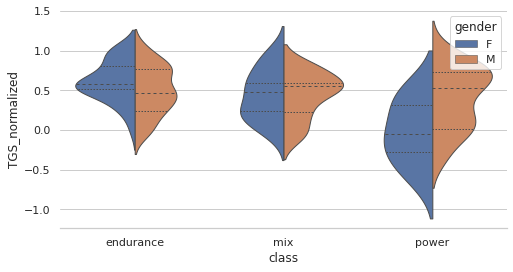

In [63]:
import seaborn as sns
import matplotlib.pylab as plt

sns.set_theme(style="whitegrid")

# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
plt.figure(figsize=(8,4))
sns.violinplot(data=lt_athletes_df, x="class", y="TGS_normalized", hue="gender",split=True, inner="quart", linewidth=1)
sns.despine(left=True)

## Section 5.2. Box plot of all markers TGS

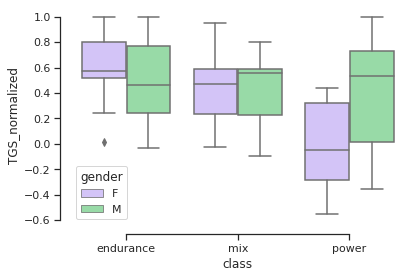

In [64]:
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="class", y="TGS_normalized",hue="gender", palette=["m", "g"],data=lt_athletes_df)
sns.despine(offset=10, trim=True)

## Section 5.3. Prepare data for visualizations. Very messy code, to tidy up

## Section 5.4. Same very messy code to tidy up. Variables ltad, TGSmat and df_visualize

In [66]:
import pandas as pd
# read the data
url="https://raw.githubusercontent.com/erinijapranckeviciene/ppolygenic/master/lt_athletes.csv"
lt_athletes_data = pd.read_csv(url)
#print(lt_athletes_data.columns)
#lt_athletes_data.describe(include=['int','int64','float','object'])
uniqgt=lt_athletes_data['ACE_rs1799752']+lt_athletes_data['ACTN3_rs1815739']+lt_athletes_data['MB_rs7293']+lt_athletes_data['AMPD1_rs17602729']
ltad=lt_athletes_data.copy()
ltad['GT']=uniqgt

print(lt_athletes_data.head())
print(ltad.head())
######################################################
# Separate data frames for genders
# create separate dataframes for endurance X gender
ltad_endurance_male=ltad[(ltad['class']=='endurance') & (ltad['gender']=='M')]
ltad_endurance_female=ltad[(ltad['class']=='endurance') & (ltad['gender']=='F')]
ltad_power_male=ltad[(ltad['class']=='power') & (ltad['gender']=='M')]
ltad_power_female=ltad[(ltad['class']=='power') & (ltad['gender']=='F')]
ltad_mix_male=ltad[(ltad['class']=='mix') & (ltad['gender']=='M')]
ltad_mix_female=ltad[(ltad['class']=='mix') & (ltad['gender']=='F')]

N=180

# endurance males
print("endurance males")
g_end_m=pd.DataFrame(ltad_endurance_male.groupby('GT')['GT'].count())
r,c=g_end_m.shape
g_end_m['GTp_end_M']=(g_end_m['GT']/r)*100
g_end_m['GTn_end_M']=(g_end_m['GT']/N)*100
g_end_m.rename_axis('Genotypes',axis="rows",inplace=True)
g_end_m.rename(columns={'GT':'Endurance_males'}, inplace=True)
print(g_end_m.head())

# endurance females
print("endurance females")
g_end_f=pd.DataFrame(ltad_endurance_female.groupby('GT')['GT'].count())
r,c=g_end_f.shape
g_end_f['GTp_end_F']=(g_end_f['GT']/r)*100
g_end_f['GTn_end_F']=(g_end_f['GT']/N)*100

g_end_f.rename_axis('Genotypes',axis="rows",inplace=True)
g_end_f.rename(columns={'GT':'Endurance_females'}, inplace=True)
print(g_end_f.head())

# power males
print("power males")
g_pow_m=pd.DataFrame(ltad_power_male.groupby('GT')['GT'].count())
r,c=g_pow_m.shape
g_pow_m['GTp_pow_M']=(g_pow_m['GT']/r)*100
g_pow_m['GTn_pow_M']=(g_pow_m['GT']/N)*100

g_pow_m.rename_axis('Genotypes',axis="rows",inplace=True)
g_pow_m.rename(columns={'GT':'Power_males'}, inplace=True)
print(g_pow_m.head())

# power females
print("power females")
g_pow_f=pd.DataFrame(ltad_power_female.groupby('GT')['GT'].count())
r,c=g_pow_f.shape
g_pow_f['GTp_pow_F']=(g_pow_f['GT']/r)*100
g_pow_f['GTn_pow_F']=(g_pow_f['GT']/N)*100

g_pow_f.rename_axis('Genotypes',axis="rows",inplace=True)
g_pow_f.rename(columns={'GT':'Power_females'}, inplace=True)
print(g_pow_f.head())

# mix males
print("mix males")
g_mix_m=pd.DataFrame(ltad_mix_male.groupby('GT')['GT'].count())
r,c=g_mix_m.shape
g_mix_m['GTp_mix_M']=(g_mix_m['GT']/r)*100
g_mix_m['GTn_mix_M']=(g_mix_m['GT']/N)*100
g_mix_m.rename_axis('Genotypes',axis="rows",inplace=True)
g_mix_m.rename(columns={'GT':'Mix_males'}, inplace=True)
print(g_mix_m.head())

# mix females
print("mix females")
g_mix_f=pd.DataFrame(ltad_mix_female.groupby('GT')['GT'].count())
r,c=g_mix_f.shape
g_mix_f['GTp_mix_F']=(g_mix_f['GT']/r)*100
g_mix_f['GTn_mix_F']=(g_mix_f['GT']/N)*100
g_mix_f.rename_axis('Genotypes',axis="rows",inplace=True)
g_mix_f.rename(columns={'GT':'Mix_females'}, inplace=True)
print(g_mix_f.head())
###########################################################
# Create variable df_visualize from gtsdist1
###########################################################
import pandas as pd
from functools import reduce

# join dfs
TGSmat.rename(columns={'GT':'Genotypes'}, inplace=True)
data_frames = [TGSmat, g_end_m, g_end_f, g_pow_m, g_pow_f, g_mix_m, g_mix_f]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Genotypes'], how='outer'), data_frames)
df_merged.fillna(0, inplace=True)
df_visualize=df_merged[['Genotypes','TGS','GTn_end_M','GTn_end_F','GTn_pow_M','GTn_pow_F','GTn_mix_M','GTn_mix_F']].copy()
df_visualize2=df_merged[['Genotypes','TGS','Endurance_males','Endurance_females','Power_males','Power_females','Mix_males','Mix_females']].copy()

df_visualize.rename(columns={'GTn_end_M':'Endurance_M','GTn_end_F':'Endurance_F', 'GTn_pow_M':'Power_M','GTn_pow_F':'Power_F', 'GTn_mix_M':'Mix_M', 'GTn_mix_F':'Mix_F'}, inplace=True)
df_visualize.sort_values(by=['TGS'],ascending=False, inplace=True)
df_visualize.head()
df_visualize2.head(50)


  ACTN3_rs1815739 AMPD1_rs17602729 MB_rs7293 ACE_rs1799752      class gender
0              RX               CT        AA            ID  endurance      F
1              RR               CC        AA            ID  endurance      F
2              XX               CT        AA            II      power      M
3              RX               CC        AG            DD      power      M
4              RX               CC        AA            II      power      M
  ACTN3_rs1815739 AMPD1_rs17602729 MB_rs7293  ...      class gender        GT
0              RX               CT        AA  ...  endurance      F  IDRXAACT
1              RR               CC        AA  ...  endurance      F  IDRRAACC
2              XX               CT        AA  ...      power      M  IIXXAACT
3              RX               CC        AG  ...      power      M  DDRXAGCC
4              RX               CC        AA  ...      power      M  IIRXAACC

[5 rows x 7 columns]
endurance males
           Endurance_males  GTp_

,Genotypes,TGS,Endurance_males,Endurance_females,Power_males,Power_females,Mix_males,Mix_females
0,DDRRAACC,0.7800,1.0,0.0,1.0,0.0,0.0,0.0
1,DDRRAACT,0.5250,0.0,1.0,0.0,0.0,0.0,0.0
2,DDRRAATT,0.1250,0.0,0.0,0.0,0.0,0.0,0.0
3,DDRRAGCC,0.8350,3.0,0.0,0.0,0.0,2.0,1.0
4,DDRRAGCT,0.5800,0.0,1.0,0.0,0.0,3.0,0.0
5,DDRRAGTT,0.1800,0.0,0.0,0.0,0.0,0.0,0.0
6,DDRRGGCC,0.4250,0.0,0.0,0.0,1.0,0.0,0.0
7,DDRRGGCT,0.1700,0.0,0.0,0.0,0.0,0.0,0.0
8,DDRRGGTT,-0.2300,0.0,0.0,0.0,0.0,0.0,0.0
9,DDRXAACC,1.0452,1.0,1.0,0.0,0.0,0.0,2.0


## Section 5.5.  The plot in which RANKED TGS (from positive endurance to negative power) is plotted and genotypes are arranged according to the ranked TGS and at each genotype barplots representing a number of athletes in sports are shown in different subplots.  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fedcd3290>,
      dtype=object)

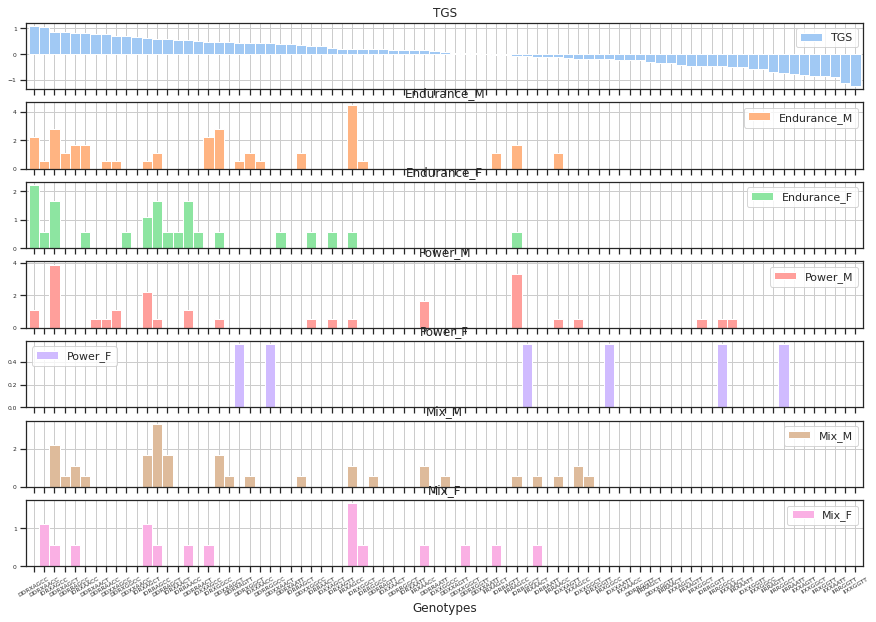

In [67]:
import matplotlib.pylab as plt

#df_visualize[['TGS','Endurance_M','Endurance_F','Genotypes']].plot(kind='bar',x='Genotypes',figsize=(30,15),width=0.4, rot=60,subplots=True)
df_visualize.plot(kind='bar',x='Genotypes',figsize=(15,10),width=1,rot=30,subplots=True,fontsize=6,grid=True)

## Section 5.x Undefined experiment

In [ ]:
transformed=[]
cnames=df_visualize.columns
df_visualize.iloc[0]['Genotypes']
r,c=df_visualize.shape
#print(cnames[2:])

for i in range(0,r):
  for name in (cnames[2:]):
   transformed.append([df_visualize.iloc[i]['Genotypes'], df_visualize.iloc[i]['TGS'],df_visualize.iloc[i][name],name])

df_visualize_transformed=pd.DataFrame(transformed,columns=['GT','TGS','Percent%','Sport_Gender'])
df_visualize_transformed.tail(30)



,GT,TGS,Percent%,Sport_Gender
456,IIXXGGCT,-1.10,0.0,Endurance_M
457,IIXXGGCT,-1.10,0.0,Endurance_F
458,IIXXGGCT,-1.10,0.0,Power_M
459,IIXXGGCT,-1.10,0.0,Power_F
460,IIXXGGCT,-1.10,0.0,Mix_M
461,IIXXGGCT,-1.10,0.0,Mix_F
462,IDRRGGTT,-1.14,0.0,Endurance_M
463,IDRRGGTT,-1.14,0.0,Endurance_F
464,IDRRGGTT,-1.14,0.0,Power_M
465,IDRRGGTT,-1.14,0.0,Power_F


# Section 6. Contingency tables of genotypes by gender and by sport and Chi-squared test for prevalence. This is independent of TGS.  

In [68]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

gendersports=pd.crosstab(lt_athletes_data['class'],lt_athletes_data['gender'])
print(gendersports)
c, p, dof, expected = chi2_contingency(gendersports)
print(p) 


ace=pd.crosstab(lt_athletes_data['ACE_rs1799752'],lt_athletes_data['gender'])
print(ace)
c, p, dof, expected = chi2_contingency(ace)
print(p) 

actn3=pd.crosstab(lt_athletes_data['ACTN3_rs1815739'],lt_athletes_data['gender'])
print(actn3)
c, p, dof, expected = chi2_contingency(actn3)
print(p) 

ampd1=pd.crosstab(lt_athletes_data['AMPD1_rs17602729'],lt_athletes_data['gender'])
print(ampd1)
c, p, dof, expected = chi2_contingency(ampd1)
print(p) 

mb=pd.crosstab(lt_athletes_data['MB_rs7293'],lt_athletes_data['gender'])
print(mb)
c, p, dof, expected = chi2_contingency(mb)
print(p) 

# contingency by sport

ace=pd.crosstab(lt_athletes_data['ACE_rs1799752'],lt_athletes_data['class'])
print(ace)
c, p, dof, expected = chi2_contingency(ace)
print(p) 

actn3=pd.crosstab(lt_athletes_data['ACTN3_rs1815739'],lt_athletes_data['class'])
print(actn3)
c, p, dof, expected = chi2_contingency(actn3)
print(p) 

ampd1=pd.crosstab(lt_athletes_data['AMPD1_rs17602729'],lt_athletes_data['class'])
print(ampd1)
c, p, dof, expected = chi2_contingency(ampd1)
print(p) 

mb=pd.crosstab(lt_athletes_data['MB_rs7293'],lt_athletes_data['class'])
print(mb)
c, p, dof, expected = chi2_contingency(mb)
print(p) 



gender      F   M
class            
endurance  27  54
mix        17  38
power       6  38
0.05231409138316346
gender          F   M
ACE_rs1799752        
DD             16  30
ID             23  61
II             11  39
0.3746217198085524
gender            F   M
ACTN3_rs1815739        
RR               16  40
RX               29  73
XX                5  17
0.8525605233963789
gender             F   M
AMPD1_rs17602729        
CC                34  99
CT                15  30
TT                 1   1
0.4701180036266156
gender      F   M
MB_rs7293        
AA         13  22
AG         27  89
GG         10  19
0.18713401208635144
class          endurance  mix  power
ACE_rs1799752                       
DD                    25   12      9
ID                    39   28     17
II                    17   15     18
0.15976469498644072
class            endurance  mix  power
ACTN3_rs1815739                       
RR                      22   18     16
RX                      50   30     22
XX     

# Section 7. Explore probabilities of Genotypes and number of athletes carrying the Genotypes. Generate expected versus observed number using binomial distribution. The probability of genotype is a probability of success event. What is a probability to observe a number K  of persons with that genotype combination among 180 controls? What is the expected value of number of successes in 180 persons?  Use variable lt_athletes_df . 

## Section 7.1 Group athletes by genotype and count the number of occurrences. Calculate expected values. Calculate variance/ standard deviation of the expected value. We assume that the gene markers are independent of each other. 

In [69]:
lt_athletes_gr=lt_athletes_df.copy()
lt_athletes_gr

,ACTN3_rs1815739,AMPD1_rs17602729,MB_rs7293,ACE_rs1799752,class,gender,GT,TGS,TGS_normalized,GTprobability
0,RX,CT,AA,ID,endurance,F,IDRXAACT,0.5602,0.538501,0.0125
1,RR,CC,AA,ID,endurance,F,IDRRAACC,0.5500,0.529784,0.0295
2,RR,CC,AA,ID,mix,F,IDRRAACC,0.5500,0.529784,0.0295
3,RR,CC,AA,ID,endurance,F,IDRRAACC,0.5500,0.529784,0.0295
4,RR,CC,AA,ID,power,M,IDRRAACC,0.5500,0.529784,0.0295
...,...,...,...,...,...,...,...,...,...,...
175,XX,CT,GG,ID,mix,M,IDXXGGCT,-0.1800,-0.094095,0.0026
176,XX,CT,AG,DD,mix,M,DDXXAGCT,0.4600,0.452867,0.0029
177,RR,CT,GG,II,power,F,IIRRGGCT,-0.7200,-0.555594,0.0110
178,RR,CT,GG,ID,power,F,IDRRGGCT,-0.0600,0.008461,0.0106


In [70]:
from scipy.stats import binom
#import matplotlib.pyplot as plt
# setting the values
# of n and p
n = 180
#p = TGSprobability
#r = Number of athletes carrying that genotype 
# Probability to observe that number binom.pmf(r, n, p) 

def bi(p,r):
  return binom.pmf(r,180,p)

ngt=lt_athletes_gr.groupby(['GT']).count()['class']
pgt=lt_athletes_gr.groupby(['GT']).max()['GTprobability']
maxtgs=lt_athletes_gr.groupby(['GT']).max('TGS')
mintgs=lt_athletes_gr.groupby(['GT']).min('TGS')

# join all groupings
rez=pd.merge(ngt,pgt,left_index=True, right_index=True)
rez=pd.merge(rez,mintgs,left_index=True, right_index=True)
rez['GTprobability']=rez['GTprobability'].astype(float)
rez['Expected_m']=rez['GTprobability'].apply(lambda x: x*180)
rez['Expected_std']=rez['GTprobability'].apply(lambda x: np.sqrt( (x)*(1-x)*180 ) )
#rez['binomp']=rez.apply(lambda x : binom.pmf(x.class, 180, x.GTprobability )) 
v=[]
for i in range(len(rez)):
  v.append(binom.pmf(rez.iloc[i,0],180,rez.iloc[i,1]))

rez['Binomp']=v
rez.sort_values(by=['Binomp'])


,class,GTprobability,TGS,TGS_normalized,Expected_m,Expected_std,Binomp
GT,,,,,,,
IDRXAGCT,12,0.0210,0.6152,0.585506,3.780,1.923700,0.000345
IDRXAGCC,20,0.0594,0.8702,0.803436,10.692,3.171261,0.002910
IIRXGGCC,1,0.0374,-0.1998,-0.111016,6.732,2.545628,0.007327
DDRXAGTT,2,0.0013,0.4452,0.440219,0.234,0.483421,0.021598
IDRRGGCC,1,0.0299,0.1950,0.226391,5.382,2.284968,0.023502
IDRRAGCC,13,0.0495,0.6050,0.576788,8.910,2.910147,0.047800
IDXXAGCC,5,0.0124,0.4850,0.474233,2.232,1.484696,0.049164
IDRXGGCC,10,0.0359,0.4602,0.453038,6.462,2.496000,0.054216
IIRXAGCC,15,0.0618,0.2102,0.239381,11.124,3.230563,0.055684


In [ ]:
# joining fields make a note to https://stackoverflow.com/questions/27174009/python-pandas-concatenate-rows-with-unique-values

# Section 8. Frequencies and TGS comparisons with Wilcoxon rank sum test E-P, E-M, P-M between Male and Female groups.


### Variable TGSmat2 - two columns Genotype and TGS_normalized renamed as TGS not to break a subsequent code. To tidy up later.  

In [71]:
TGSmat2=TGSmat[['Genotypes','TGS_normalized']].copy()
TGSmat2.rename(columns={'TGS_normalized': "TGS", "Genotypes" : "GT"}, inplace=True)
TGSmat2.tail()

,GT,TGS
76,IIXXAGCT,-0.307751
77,IIXXAGTT,-0.649603
78,IIXXGGCC,-0.440219
79,IIXXGGCT,-0.658149
80,IIXXGGTT,-1.000000


## Create gtsdf - matrix of composite genotype , gender and class, and gtsmerge - add the TGS to this matrix

In [72]:
import numpy as np
import pandas as pd
nr,nc=lt_athletes_data.shape
print(nr)
gts=np.zeros([nr,3], dtype=object)
for i in range(0,nr):
    drow   = lt_athletes_data.iloc[i]
    gta = drow['ACE_rs1799752']+drow['ACTN3_rs1815739']+drow['MB_rs7293']+drow['AMPD1_rs17602729']
    #print(gta)
    gts[i,0]=gta
    gts[i,1]=drow['class']
    gts[i,2]=drow['gender']
gtsdf=pd.DataFrame(gts,columns=['GT','class','gender'])
gtsdf.tail()
# Here we have to add TGS - compute join with null matrix
gtsmerge=pd.merge(gtsdf,TGSmat2,on='GT')
gtsmerge.sort_values(['TGS'], ascending=False, inplace=True)
gtsmerge.head(3)
# and make comparisons with Wilcoxon rank sum test


180


,GT,class,gender,TGS
16,DDRXAGCC,power,M,1.0
13,DDRXAGCC,endurance,M,1.0
17,DDRXAGCC,endurance,F,1.0


## Prepare data as aplot to draw a number of athletes of different sports versus the TGS , the variable aplot that is generated from gtsmerge

In [73]:
allathletes=(pd.DataFrame(gtsmerge.groupby('TGS')['TGS'].count(), columns=['TGS'])).copy()
allathletes.rename(columns={'TGS':'All_athletes'}, inplace=True)
print(allathletes.head(2))
epathletes=(pd.DataFrame(gtsmerge[(gtsmerge['class']!='mix')].groupby('TGS')['TGS'].count(), columns=['TGS'])).copy()
epathletes.rename(columns={'TGS':'Edurance_Power_athletes'}, inplace=True)
print(epathletes.head(2))
eathletes=(pd.DataFrame(gtsmerge[(gtsmerge['class']=='endurance')].groupby('TGS')['TGS'].count(), columns=['TGS'])).copy()
eathletes.rename(columns={'TGS':'Edurance_athletes'}, inplace=True)
print(eathletes.head(2))
pathletes=(pd.DataFrame(gtsmerge[(gtsmerge['class']=='power')].groupby('TGS')['TGS'].count(), columns=['TGS'])).copy()
pathletes.rename(columns={'TGS':'Power_athletes'}, inplace=True)
print(pathletes.head(2))
mathletes=(pd.DataFrame(gtsmerge[(gtsmerge['class']=='mix')].groupby('TGS')['TGS'].count(), columns=['TGS'])).copy()
mathletes.rename(columns={'TGS':'Mix_athletes'}, inplace=True)
print(mathletes.head(2))


aplot=pd.merge(allathletes,epathletes, on='TGS',how='outer')
aplot.fillna(0,inplace=True)
aplot.sort_index(0, inplace=True)
print(aplot.head(40))

epaplot=pd.merge(eathletes,pathletes, on='TGS',how='outer')
epmplot=pd.merge(epaplot,mathletes, on='TGS',how='outer')
epmplot.fillna(0,inplace=True)
epmplot.sort_index(0, inplace=True)
print(epmplot.head(100))


           All_athletes
TGS                    
-0.555594             1
-0.354756             1
           Edurance_Power_athletes
TGS                               
-0.555594                        1
-0.354756                        1
           Edurance_athletes
TGS                         
-0.034271                  2
 0.012734                  4
           Power_athletes
TGS                      
-0.555594               1
-0.354756               1
           Mix_athletes
TGS                    
-0.094095             1
-0.089821             2
           All_athletes  Edurance_Power_athletes
TGS                                             
-0.555594             1                      1.0
-0.354756             1                      1.0
-0.337663             2                      2.0
-0.328946             1                      1.0
-0.111016             1                      1.0
-0.094095             1                      0.0
-0.089821             3                      1.0
-0.0342

## LEAVE IT ASIDE. For later. Paired Wilcoxon test between the TGS of power and endurance , endurance and mix , power and mix athletes. Athlete numbers having genotypes are compared. 

In [74]:
from scipy.stats import wilcoxon
d=(epmplot['Edurance_athletes']/81)*100-(epmplot['Power_athletes']/44)*100
print("Endurance minus Power TGS normalized")
w, p = wilcoxon(d)
print(w, p)

d=(epmplot['Edurance_athletes']/81)*100-(epmplot['Mix_athletes']/55)*100
print("Endurance minus Mix TGS normalized")
w, p = wilcoxon(d)
print(w, p)

d=(epmplot['Mix_athletes']/55)*100-(epmplot['Power_athletes']/44)*100
print("Mix minus Power TGS normalized")
w, p = wilcoxon(d)
print(w, p)

print("Not normalized")
from scipy.stats import wilcoxon
d=epmplot['Edurance_athletes']-epmplot['Power_athletes']
print("Endurance minus Power TGS")
w, p = wilcoxon(d)
print(w, p)

d=epmplot['Edurance_athletes']-epmplot['Mix_athletes']
print("Endurance minus Mix TGS")
w, p = wilcoxon(d)
print(w, p)

d=epmplot['Mix_athletes']-epmplot['Power_athletes']
print("Mix minus Power TGS")
w, p = wilcoxon(d)
print(w, p)

Endurance minus Power TGS normalized
363.0 0.7057488619026187
Endurance minus Mix TGS normalized
339.0 0.8499796199366139
Mix minus Power TGS normalized
347.5 0.5506237929074784
Not normalized
Endurance minus Power TGS
181.5 0.025125277968492336
Endurance minus Mix TGS
199.5 0.08542765610346474
Mix minus Power TGS
319.0 0.43657804753753915


#Plot number of athletes at different TGS values in different sports


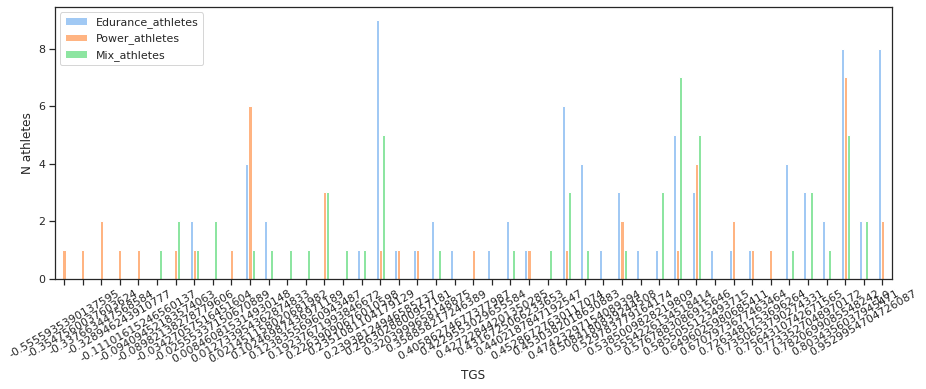

In [75]:
epmplot.plot.bar(rot=30,figsize=(15,5),ylabel='N athletes')

# Compare TGS between athletes groups. Apply Wilcoxon tests

In [76]:
from scipy.stats import ranksums
######################### All athletes
print("")
print("All Athletes")
print("")

# Endurance versus Power 
sample1=gtsmerge[(gtsmerge['class']=='power')]['TGS']
sample2=gtsmerge[(gtsmerge['class']=='endurance')]['TGS']
print("Endurance versus Power")
print(ranksums(sample1, sample2))

# Endurance versus Mix
sample1=gtsmerge[(gtsmerge['class']=='mix')]['TGS']
sample2=gtsmerge[(gtsmerge['class']=='endurance')]['TGS']
print("Endurance versus Mix")
print(ranksums(sample1, sample2))

# Power versus Mix
sample1=gtsmerge[(gtsmerge['class']=='mix')]['TGS']
sample2=gtsmerge[(gtsmerge['class']=='power')]['TGS']
print("Power versus Mix")
print(ranksums(sample1, sample2))

########### Males
print("")
print("Males")
print("")
# Endurance versus Power 
sample1=gtsmerge[(gtsmerge['class']=='power') & (gtsmerge['gender']=='M')]['TGS']
sample2=gtsmerge[(gtsmerge['class']=='endurance')& (gtsmerge['gender']=='M')]['TGS']
print("Endurance versus Power")
print(ranksums(sample1, sample2))

# Endurance versus Mix
sample1=gtsmerge[(gtsmerge['class']=='mix')& (gtsmerge['gender']=='M')]['TGS']
sample2=gtsmerge[(gtsmerge['class']=='endurance')& (gtsmerge['gender']=='M')]['TGS']
print("Endurance versus Mix")
print(ranksums(sample1, sample2))

# Power versus Mix
sample1=gtsmerge[(gtsmerge['class']=='mix')& (gtsmerge['gender']=='M')]['TGS']
sample2=gtsmerge[(gtsmerge['class']=='power')& (gtsmerge['gender']=='M')]['TGS']
print("Power versus Mix")
print(ranksums(sample1, sample2))

########### Females
print("")
print("Females")
print("")
# Endurance versus Power 
sample1=gtsmerge[(gtsmerge['class']=='power') & (gtsmerge['gender']=='F')]['TGS']
sample2=gtsmerge[(gtsmerge['class']=='endurance')& (gtsmerge['gender']=='F')]['TGS']
print("Endurance versus Power")
print(ranksums(sample1, sample2))

# Endurance versus Mix
sample1=gtsmerge[(gtsmerge['class']=='mix')& (gtsmerge['gender']=='F')]['TGS']
sample2=gtsmerge[(gtsmerge['class']=='endurance')& (gtsmerge['gender']=='F')]['TGS']
print("Endurance versus Mix")
print(ranksums(sample1, sample2))

# Power versus Mix
sample1=gtsmerge[(gtsmerge['class']=='mix')& (gtsmerge['gender']=='F')]['TGS']
sample2=gtsmerge[(gtsmerge['class']=='power')& (gtsmerge['gender']=='F')]['TGS']
print("Power versus Mix")
print(ranksums(sample1, sample2))

########### Females versus Males in Sports groups
print("")
print("Females versus Males")
print("")
# Endurance versus Power 
sample1=gtsmerge[(gtsmerge['class']=='power') & (gtsmerge['gender']=='F')]['TGS']
sample2=gtsmerge[(gtsmerge['class']=='power')& (gtsmerge['gender']=='M')]['TGS']
print("Power sports")
print(ranksums(sample1, sample2))

# Endurance versus Mix
sample1=gtsmerge[(gtsmerge['class']=='endurance')& (gtsmerge['gender']=='F')]['TGS']
sample2=gtsmerge[(gtsmerge['class']=='endurance')& (gtsmerge['gender']=='M')]['TGS']
print("Endurance sports")
print(ranksums(sample1, sample2))

# Power versus Mix
sample1=gtsmerge[(gtsmerge['class']=='mix')& (gtsmerge['gender']=='F')]['TGS']
sample2=gtsmerge[(gtsmerge['class']=='mix')& (gtsmerge['gender']=='M')]['TGS']
print("Mix sports")
print(ranksums(sample1, sample2))



All Athletes

Endurance versus Power
RanksumsResult(statistic=-2.2848556722006896, pvalue=0.02232129198244168)
Endurance versus Mix
RanksumsResult(statistic=-1.689395997550778, pvalue=0.0911435675111029)
Power versus Mix
RanksumsResult(statistic=0.7957220329480692, pvalue=0.42619361758233754)

Males

Endurance versus Power
RanksumsResult(statistic=-0.9238179488355409, pvalue=0.355581108509578)
Endurance versus Mix
RanksumsResult(statistic=-0.808836315718671, pvalue=0.41860930423442344)
Power versus Mix
RanksumsResult(statistic=-0.14544195362268578, pvalue=0.884361942594492)

Females

Endurance versus Power
RanksumsResult(statistic=-3.31399619886629, pvalue=0.0009197275753664054)
Endurance versus Mix
RanksumsResult(statistic=-1.8439088914585775, pvalue=0.06519641907812998)
Power versus Mix
RanksumsResult(statistic=2.3804761428476167, pvalue=0.017290280592906253)

Females versus Males

Power sports
RanksumsResult(statistic=-2.411049127400112, pvalue=0.015906705657373503)
Endurance sport

# Create new variable gtsm for plotting number of athletes versus genotypes. To tidy up. Grouping by genotype, sport , gender. The plots that follow are independent of TGS. 

In [77]:
# Example of grouping just to keep the snippet to remember
#g=gtsdf.groupby(['GT','gender','class'])['class'].count()
#pd.set_option('max_rows',96 )
#g

gtsgender=pd.crosstab(gtsdf['GT'],gtsdf['gender'])   
gtsclass=pd.crosstab(gtsdf['GT'],gtsdf['class'])

# merge gtsclass and gtsgender
gtsm=pd.merge(gtsclass,gtsgender,on='GT')
#gtsm1=gtsm.drop([0],axis=0)
#gtsm2=gtsm.drop(['0_x','0_y'],axis=1)

# Number of individuals with that genotype combination N

sum_column = gtsm["F"] + gtsm["M"]
gtsm["N"] = sum_column
gtsm['GTS']=gtsm.index
gtsm.head()


,endurance,mix,power,F,M,N,GTS
GT,,,,,,,
DDRRAACC,1,0,1,0,2,2,DDRRAACC
DDRRAACT,1,0,0,1,0,1,DDRRAACT
DDRRAGCC,3,3,0,1,5,6,DDRRAGCC
DDRRAGCT,1,3,0,1,3,4,DDRRAGCT
DDRRGGCC,0,0,1,1,0,1,DDRRGGCC


## Plot gender distribution across genotypes

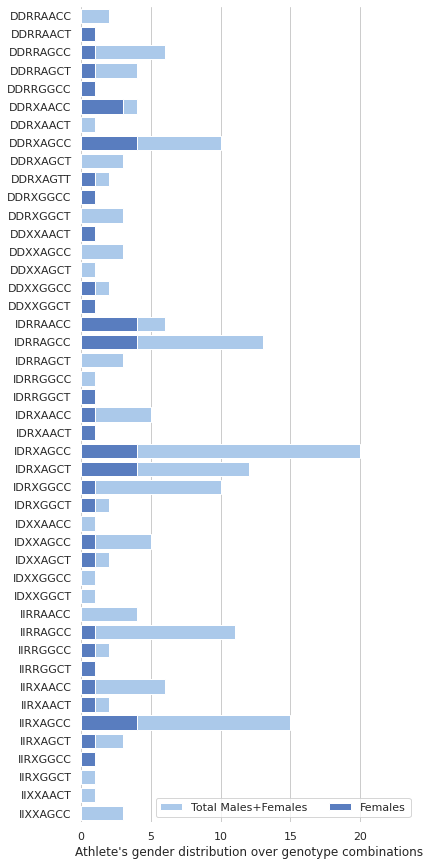

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
# Plot the total individuals with genotype combination
sns.set_color_codes("pastel")
sns.barplot(x="N", y="GTS", data=gtsm, label="Total Males+Females", color="b")

# Plot Females of the genotype
sns.set_color_codes("muted")
sns.barplot(x="F", y="GTS", data=gtsm, label="Females", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="", xlabel="Athlete's gender distribution over genotype combinations")
sns.despine(left=True, bottom=True)




## Plot how number of athlets distributed across genotypes. Genotypes and sports 

[Text(0, 0.5, 'N athletes'),
 Text(0.5, 0, 'Composite genotype of markers ACE, ACTN3, AMPD1 and MB')]

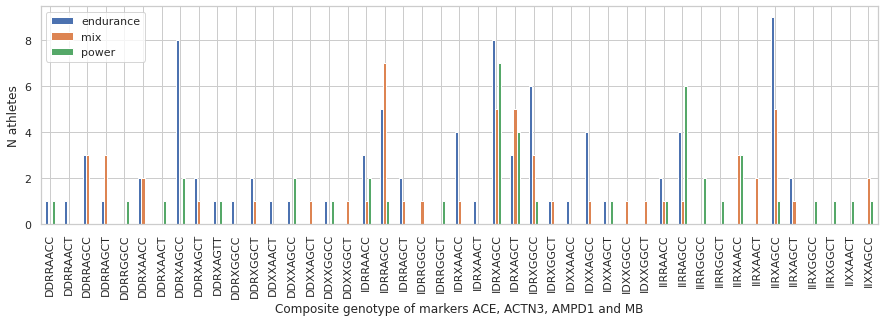

In [79]:
gtsm.plot.bar(y=['endurance','mix','power'],figsize=(15,4)).set(ylabel='N athletes', xlabel='Composite genotype of markers ACE, ACTN3, AMPD1 and MB')

#Binomial

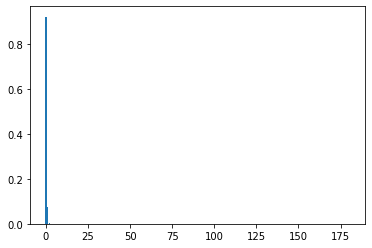

In [ ]:
from scipy.stats import binom
import matplotlib.pyplot as plt
# setting the values
# of n and p
n = 180
p = ts
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]
# plotting the graph 
plt.bar(r_values, dist)
plt.show()